In [1]:
# import necessary packages
import numpy as np
import torch
from tqdm import tqdm
from matplotlib import pyplot as plt
from Capacity import *

%matplotlib inline
%config InlineBackend.figure_format = 'svg'


#### Gaussian inputs, capacity test

In [2]:
# SNR range (dB)
SNR_start, SNR_step, SNR_end = -20, 1, 20
SNR_range = np.arange(SNR_start, SNR_end, SNR_step)

awgn_gaussian_capacity = Gaussian_Capacity('awgn', SNR_range)
rayleigh_gaussian_capacity = Gaussian_Capacity('rayleigh', SNR_range, 10000)

40it [00:00, 4192.63it/s]


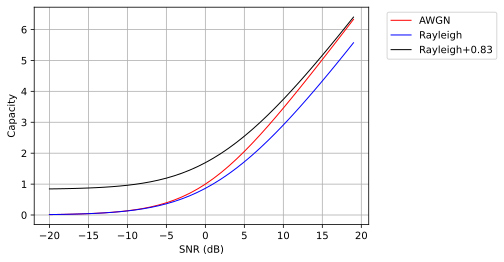

In [3]:
fig = plt.figure()
plt.grid()

plt.plot(SNR_range, awgn_gaussian_capacity, linewidth=1.0, linestyle='-', color='r', label="AWGN")
plt.plot(SNR_range, rayleigh_gaussian_capacity, linewidth=1.0, linestyle='-', color='b', label="Rayleigh")
# TSE Book P235, Log-Rayleigh Distribution, 0.83 bps/Hz gap in hign SNR region
plt.plot(SNR_range, rayleigh_gaussian_capacity+0.83, linewidth=1.0, linestyle='-', color='k', label="Rayleigh+0.83")

plt.xlabel("SNR (dB)")
plt.ylabel("Capacity")

plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")

#### CM capacity test

In [4]:
# constellation points, (1xM) numpy array
conste_symbols_BPSK = np.array([[-1, 1]])
conste_symbols_QPSK = np.array([[-1, 1, 1j, -1j]])

# channel type, 'awgn' or 'rayleigh'
chan_type = "awgn"

# SNR range (dB)
SNR_start, SNR_step, SNR_end = -20, 0.5, 35
SNR_range = np.arange(SNR_start, SNR_end, SNR_step)

# number of MC simulations
sim_num = 10000000

capacity_BPSK = CM_Capacity(conste_symbols_BPSK, chan_type, SNR_range, sim_num)
capacity_QPSK = CM_Capacity(conste_symbols_QPSK, chan_type, SNR_range, sim_num)

110it [00:01, 105.59it/s]
110it [00:03, 28.00it/s]


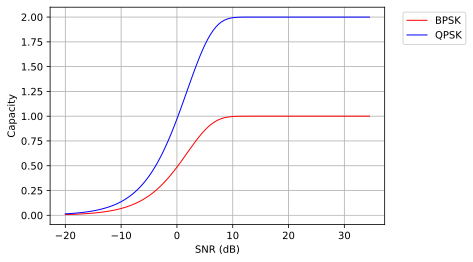

In [5]:
fig = plt.figure()
plt.grid()

plt.plot(SNR_range, capacity_BPSK, linewidth=1.0, linestyle='-', color='r', label="BPSK")
plt.plot(SNR_range, capacity_QPSK, linewidth=1.0, linestyle='-', color='b', label="QPSK")

plt.xlabel("SNR (dB)")
plt.ylabel("Capacity")

plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")

#### Capacity vs. EbN0

In [6]:
EbN0_BPSK = SNR_range-10*np.log10(2*capacity_BPSK)
EbN0_QPSK = SNR_range-10*np.log10(capacity_QPSK)

eta = np.arange(0.001, 4, 0.001)
EbN0 = 10*np.log10((2**eta-1)/eta)

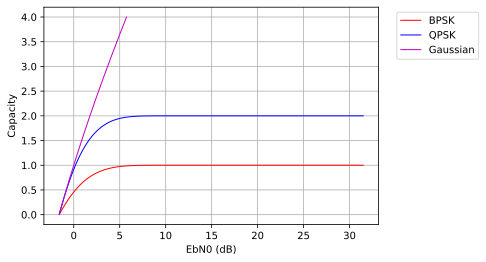

In [7]:
fig = plt.figure()
plt.grid()

plt.plot(EbN0_BPSK, capacity_BPSK, linewidth=1.0, linestyle='-', color='r', label="BPSK")
plt.plot(EbN0_QPSK, capacity_QPSK, linewidth=1.0, linestyle='-', color='b', label="QPSK")
plt.plot(EbN0, eta, linewidth=1.0, linestyle='-', color='m', label="Gaussian")

plt.xlabel("EbN0 (dB)")
plt.ylabel("Capacity")

plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")

#### BICM capacity test

In [8]:
# constellation points, (1xM) numpy array
conste_symbols = np.array([[-1, 1, 1j, -1j]])
conste_labels1 = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
conste_labels2 = np.array([[0, 0], [1, 1], [1, 0], [0, 1]])

# SNR range
SNR_start, SNR_step, SNR_end = -20, 0.1, 35
SNR_range = np.arange(SNR_start, SNR_end, SNR_step)

# number of MC simulations
sim_num = 100000

bit_capacity1, capacity1 = BICM_Capacity(conste_symbols, conste_labels1, 'awgn', SNR_range, sim_num)
bit_capacity2, capacity2 = BICM_Capacity(conste_symbols, conste_labels1, 'rayleigh', SNR_range, sim_num)
bit_capacity3, capacity3 = BICM_Capacity(conste_symbols, conste_labels2, 'awgn', SNR_range, sim_num)
bit_capacity4, capacity4 = BICM_Capacity(conste_symbols, conste_labels2, 'rayleigh', SNR_range, sim_num)

550it [00:01, 373.25it/s]
550it [00:01, 332.71it/s]
550it [00:01, 345.66it/s]
550it [00:01, 334.38it/s]


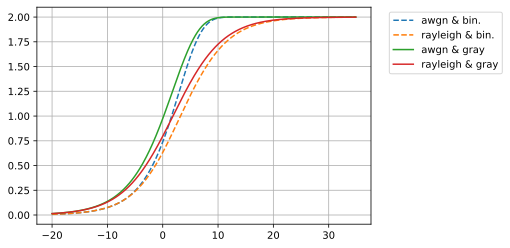

In [11]:
fig = plt.figure()
plt.grid()

plt.plot(SNR_range, capacity1, label='awgn & bin.', linestyle='--')
plt.plot(SNR_range, capacity2, label='rayleigh & bin.', linestyle='--')
plt.plot(SNR_range, capacity3, label='awgn & gray')
plt.plot(SNR_range, capacity4, label='rayleigh & gray')

plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")